In [1]:
# Change dir to src
import os
os.chdir("../src")

In [2]:
import albumentations as A
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2

from datasets.shoe_dataset import FootwearDataset
from datasets.utils import get_dataloader

In [3]:
dataset = FootwearDataset(
    index_path="../data/index/train.csv",
    root_data_dir="../",
    transforms=A.Compose([A.Resize(240, 240), ToTensorV2()]),
)
dataloader = get_dataloader(dataset, batch_size=16, shuffle=True, num_workers=8, pin_memory=True)
labels_encoder = dataset.labels_encoder

In [4]:
def plot_grid_of_images(dataloader, labels_encoder, nrows=4, ncols=4):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
    fig.tight_layout()
    for i, (image, label) in enumerate(dataloader):
        label = labels_encoder.inverse_transform(label)[0][0].upper()  # Convert label to string
        
        ax[i // 4, i % 4].imshow(image[0].permute(1, 2, 0))
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
        if i == 15:
            break

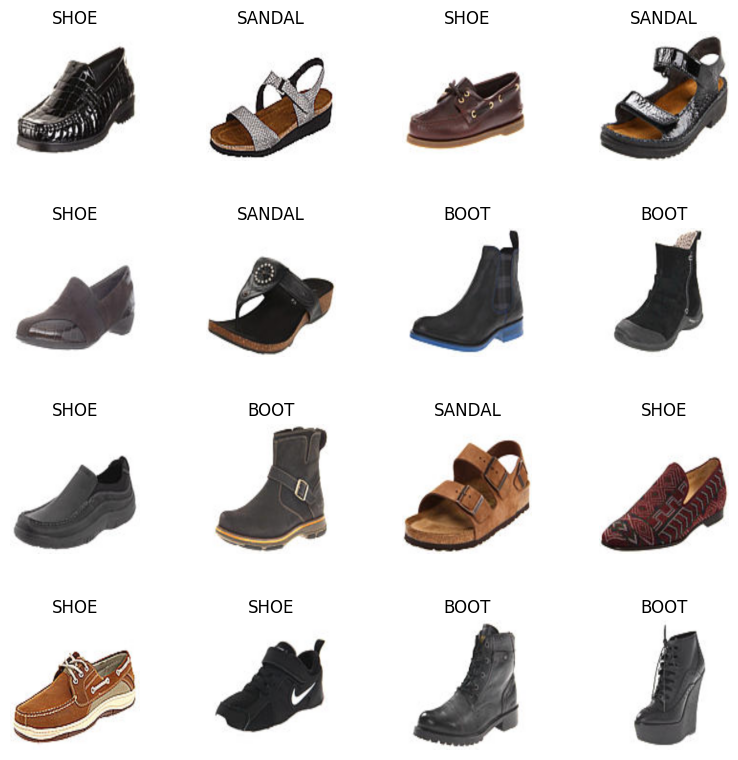

In [5]:
# Visualize an image from the dataset
plot_grid_of_images(dataloader, labels_encoder)

In [13]:
aug_dataset = FootwearDataset(
    index_path="../data/index/train.csv",
    root_data_dir="../",
    transforms=A.Compose(
        [
            A.Resize(240, 240),
            A.ColorJitter(brightness=0.3, contrast=0.4, p=0.5),
            A.Rotate(limit=40, p=0.5),
            A.GaussianBlur(blur_limit=(3, 7), p=0.5),
            A.HorizontalFlip(p=0.5),
            A.CoarseDropout(max_holes=5, max_height=32, max_width=32, p=0.4),
            ToTensorV2(),
        ]
    ),
)
aug_dataloader = get_dataloader(aug_dataset, batch_size=16, shuffle=True, num_workers=8, pin_memory=True)

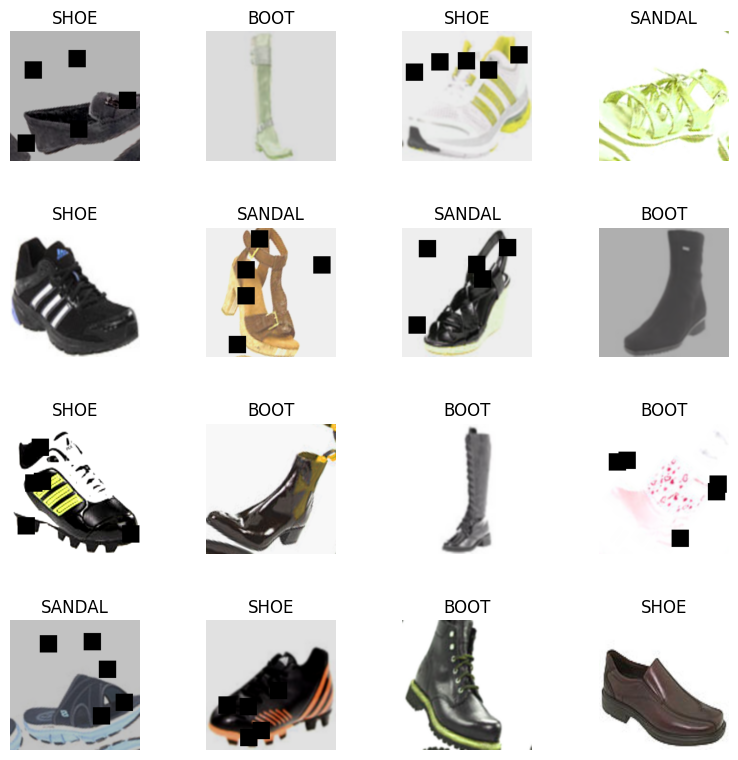

In [14]:
plot_grid_of_images(aug_dataloader, labels_encoder)